# Wind Model 

In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import pickle
%matplotlib inline

In [13]:
import pandas as pd
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_45bf43b2999d4e748ca13e89a0c5fc64 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2-Wq8RQj6UYD83ivZdzFh-r-CruyydtU1mc6xGNW204f',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_45bf43b2999d4e748ca13e89a0c5fc64.get_object(Bucket='predictingtheenergyoutputofwindtu-donotdelete-pr-mdefl0pcqpzq9d',Key='wind_speed_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (degrees)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (degrees)       50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


# Visualization of data

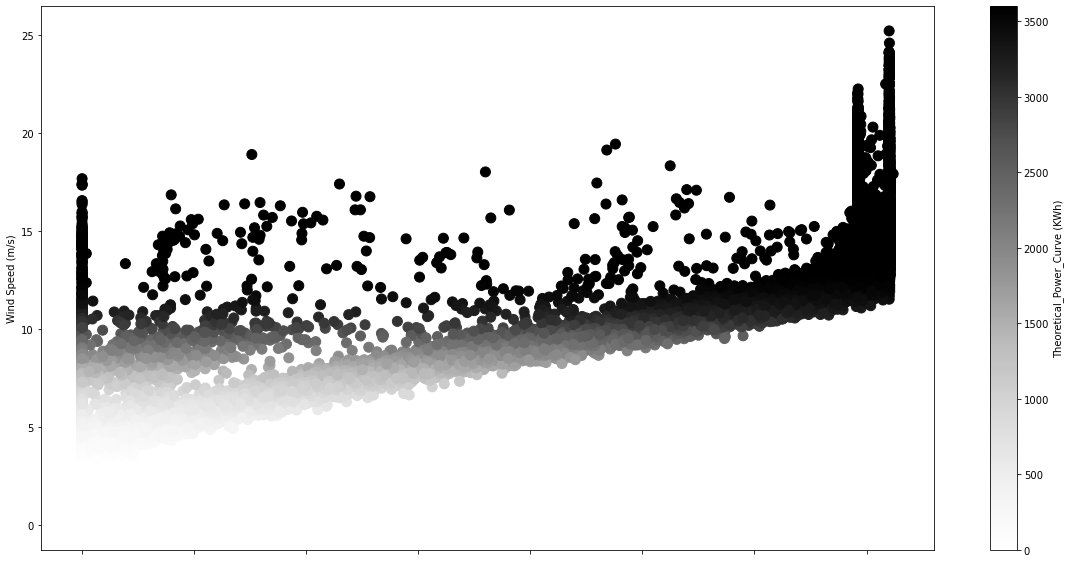

In [15]:
df.plot.scatter(x='LV ActivePower (kW)',y='Wind Speed (m/s)',c='Theoretical_Power_Curve (KWh)',s=100,figsize=(20,10))

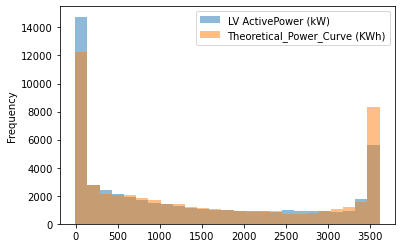

In [16]:
df[['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)']].plot.hist(alpha=0.5,bins=25)

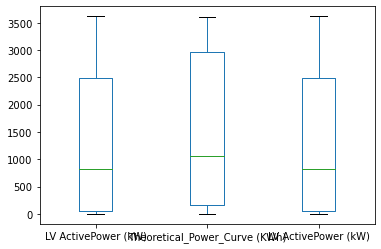

In [17]:
df[['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)']].plot.box()

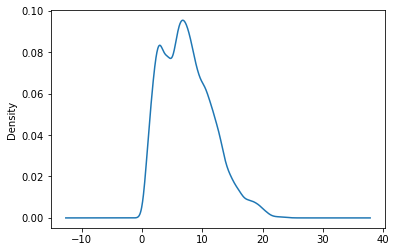

In [18]:
df['Wind Speed (m/s)'].plot.kde()

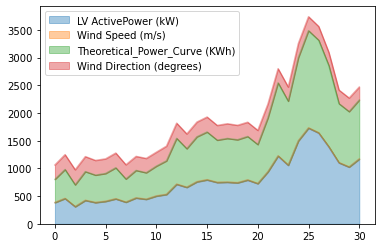

In [19]:
df.loc[0:30].plot.area(alpha=0.4)

# Taking care of missing data

In [20]:
df.isnull().sum() 

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (degrees)         0
dtype: int64

we use df.fillna(df.mean(),inplace=True) in case of missing data.
Since no data is missing so we skip adding data

In [21]:
X = df[['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (degrees)']]
y= df['LV ActivePower (kW)']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[08:23:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [24]:
import numpy as np
y_pred = xgb.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

0.9085975057217943
381.1840573925949


In [25]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [26]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

0.8975825374784779
406.9943265364238


In [27]:
y_pred

array([ 480.55572882, 1512.19608813, 1437.99910034, ...,  688.11765845,
       3562.12546826,  609.19082483])

In [28]:
#xgb.save_model("wind_energy.pkl")

In [29]:
import joblib
#save model
joblib.dump(rfc, "wind_energy.pkl") 

#load saved model
m = joblib.load("wind_energy.pkl")

In [30]:
prediction=m.predict([[34.67,21,45]])

In [31]:
prediction[0]

1162.0512052765487

In [32]:
pip install ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [33]:
wml_credentials = {
                      "apikey":"L1-qvZWih6iLNKtespNQsGVQ5zDa7ydNzhVZNGhJ7TXW",
                      "url": "https://us-south.ml.cloud.ibm.com"
}

In [34]:
from ibm_watson_machine_learning import APIClient
wml_client = APIClient(wml_credentials)

2020-11-30 08:24:36,057 - ibm_watson_machine_learning.wml_client_error - WARNING - Failure during scoring. (POST https://us-south.ml.cloud.ibm.com/ml/v4/deployments/5d6ea0e4-141b-46fb-9e9a-8bb7bfaf2d4b/predictions?version=2020-08-01)
Status code: 400, body: {"trace": "3d9220c19b07432a0ecdac36805066ae", "errors": [{"code": "invalid_input_data", "message": "Feature number mismatch. Number of features of the input data must match the number of features of the model", "target": {"type": "field", "name": "values"}}], "status_code": 400}



In [35]:
wml_client.repository.ModelMetaNames.show()

------------------------  ----  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
META_PROP NAME            TYPE  REQUIRED  SCHEMA
NAME                      str   Y
DESCRIPTION               str   N
INPUT_DATA_SCHEMA         list  N         {'id(required)': 'string', 'fields(required)': [{'name(required)': 'string', 'type(required)': 'string', 'nullable(optional)': 'string'}]}
TRAINING_DATA_REFERENCES  list  N         [{'name(optional)': 'string', 'type(required)': 'string', 'connection(required)': {'endpoint_url(required)': 'string', 'access_key_id(required)': 'string', 'secret_access_key(required)': 'string'},

In [36]:
def guid_from_space_name(wml_client, space_name):
     instance_details = wml_client.service_instance.get_details()
     space = wml_client.spaces.get_details()
     return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

In [37]:
space_uid = "ff0b0cd8-aa87-4c8f-b468-b78244f2fe99"
#guid_from_space_name(wml_client, 'Deployment of Energy Output').   not working instances not found

In [38]:
wml_client.set.default_space(space_uid)

'SUCCESS'

In [39]:
sw_spec_id = wml_client.software_specifications.get_id_by_name('default_py3.7')
meta_props={
 wml_client.repository.ModelMetaNames.NAME: "EnergyOutputPrediction",
 wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_id,
 wml_client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23",
}

In [40]:
model_artifact = wml_client.repository.store_model(xgb,
                                                meta_props=meta_props,
                                                training_data=X_train,
                                                training_target=y_train)
model_uid = wml_client.repository.get_model_uid(model_artifact)
print("Model UID = " + model_uid)

Model UID = 46e5b987-c6fb-4c14-9384-d79f82189147


In [41]:
model_details = wml_client.repository.get_details(model_uid)
from pprint import pprint
pprint(model_details)

{'entity': {'label_column': 'LV ActivePower (kW)',
            'software_spec': {'id': 'e4429883-c883-42b6-87a8-f419d64088cd',
                              'name': 'default_py3.7'},
            'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
                                                         'endpoint_url': 'not_applicable',
                                                         'secret_access_key': 'not_applicable'},
                                          'id': '1',
                                          'location': {},
                                          'schema': {'fields': [{'name': 'Wind '
                                                                         'Speed '
                                                                         '(m/s)',
                                                                 'type': 'float64'},
                                                                {'name': 'Theoretical_Power_Curv

In [42]:
deploy_meta = {
     wml_client.deployments.ConfigurationMetaNames.NAME: "Predict Energy Output",
     wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
 }

In [43]:
deployment_details = wml_client.deployments.create(model_uid, meta_props=deploy_meta)



#######################################################################################

Synchronous deployment creation for uid: '46e5b987-c6fb-4c14-9384-d79f82189147' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5d6ea0e4-141b-46fb-9e9a-8bb7bfaf2d4b'
------------------------------------------------------------------------------------------------




In [44]:
deployment_uid = wml_client.deployments.get_uid(deployment_details)
print('Deployment uid = {}'.format(deployment_uid))

Deployment uid = 5d6ea0e4-141b-46fb-9e9a-8bb7bfaf2d4b


In [45]:
job_payload = {
   wml_client.deployments.ScoringMetaNames.INPUT_DATA: [{
     'values': [list(X_test['Wind Speed (m/s)']), list(X_test['Theoretical_Power_Curve (KWh)']), list(X_test['Wind Direction (degrees)'])]
   }]
 }
pprint(job_payload)

{'input_data': [{'values': [[5.95249605178833,
                             8.13491821289062,
                             8.20711517333984,
                             11.830909729003901,
                             4.29070091247558,
                             2.39745092391967,
                             9.93638515472412,
                             14.427680015563901,
                             2.23681092262268,
                             1.6919970512390101,
                             5.80398416519165,
                             7.96921491622924,
                             5.21127700805664,
                             3.17312097549438,
                             9.86702728271484,
                             18.6848392486572,
                             12.4558601379394,
                             1.4528180360793999,
                             8.57926654815673,
                             14.829090118408198,
                             3.28179788589477,
   

                             10.924670219421301,
                             8.84927654266357,
                             0.604696214199066,
                             7.774558067321769,
                             4.20008420944213,
                             1.7261749505996697,
                             17.2980194091796,
                             7.7913670539855895,
                             9.33415985107421,
                             6.557679176330559,
                             7.87803220748901,
                             7.8862619400024405,
                             9.17930316925048,
                             11.970419883728,
                             7.33034181594848,
                             9.85082912445068,
                             4.74757814407348,
                             7.48207092285156,
                             9.635618209838858,
                             3.91136002540588,
                             4.67302513122558,
  

                             3.05820894241333,
                             0.31844690442085305,
                             14.0651502609252,
                             16.7997207641601,
                             6.21886110305786,
                             14.431750297546301,
                             7.29873991012573,
                             8.11019802093505,
                             11.4340095520019,
                             5.06149101257324,
                             2.33976006507873,
                             1.2742600440979,
                             6.187249183654781,
                             8.72590446472167,
                             2.6131091117858802,
                             6.00275421142578,
                             11.4306297302246,
                             8.458253860473631,
                             11.6671199798583,
                             5.25061178207397,
                             16.5853004455566,
     

                             10.2002801895141,
                             11.6668701171875,
                             13.0721101760864,
                             15.7906398773193,
                             14.1243801116943,
                             10.0557603836059,
                             17.094820022583,
                             15.5381202697753,
                             4.022500991821279,
                             3.96799898147583,
                             6.703770160675041,
                             2.45449495315551,
                             7.49603509902954,
                             9.25847053527832,
                             11.025679588317802,
                             7.63011598587036,
                             2.67670702934265,
                             5.11227083206176,
                             22.245370864868104,
                             7.12577390670776,
                             9.16217994689941,
        

                             6.6135869026184,
                             8.48792552947998,
                             4.56176805496215,
                             10.8193302154541,
                             5.09655380249023,
                             0.4603070914745329,
                             4.58827686309814,
                             2.61882591247558,
                             10.564629554748501,
                             8.76040935516357,
                             7.65632486343383,
                             3.15257596969604,
                             5.8524641990661594,
                             6.89244794845581,
                             2.29943990707397,
                             9.644821166992179,
                             7.306089878082269,
                             9.96915054321289,
                             10.444459915161099,
                             7.312902927398679,
                             5.75451183319091,
   

                             2.19365000724792,
                             0.7449004054069509,
                             8.67540645599365,
                             5.096495151519769,
                             0.802478790283203,
                             3.66598105430603,
                             6.28866720199584,
                             5.12414121627807,
                             10.3414802551269,
                             8.129147529602049,
                             8.64220523834228,
                             6.19072484970092,
                             5.55441999435424,
                             9.17570686340332,
                             6.6343650817871,
                             9.36262035369873,
                             18.122720718383697,
                             6.4291081428527805,
                             10.0788602828979,
                             5.185399055480951,
                             11.3788900375366,
    

                             3.92190194129943,
                             6.43806505203247,
                             11.9969902038574,
                             12.7555599212646,
                             5.05788278579711,
                             3.7968890666961603,
                             8.3959093093872,
                             4.37706518173217,
                             9.51209068298339,
                             9.478649139404288,
                             10.804820060729899,
                             9.23834991455078,
                             8.60683536529541,
                             11.2930097579956,
                             9.147289276123038,
                             8.98453140258789,
                             18.394109725952102,
                             7.38089895248413,
                             3.49669003486633,
                             8.536304473876951,
                             11.068610191345199,
   

                             12.0560998916625,
                             2.88850808143615,
                             13.6338396072387,
                             6.90814876556396,
                             14.646530151367099,
                             8.542441368103018,
                             4.826085090637201,
                             4.01006603240966,
                             8.0756664276123,
                             4.38172817230224,
                             1.92043197154998,
                             10.0555601119995,
                             9.18887329101562,
                             9.28551387786865,
                             6.9998550415039,
                             6.242475032806389,
                             12.693329811096099,
                             5.00852823257446,
                             1.49674797058105,
                             3.9848740100860502,
                             8.27597045898437,
      

                             9.077876091003409,
                             11.229390144348098,
                             11.3101301193237,
                             2.57747793197631,
                             12.0071401596069,
                             13.636010169982901,
                             5.82908105850219,
                             8.99227142333984,
                             4.19839000701904,
                             11.8922595977783,
                             9.66420841217041,
                             3.23989295959472,
                             19.0573692321777,
                             7.3730340003967205,
                             5.611424922943111,
                             16.2837009429931,
                             0.877715408802032,
                             7.52155208587646,
                             6.694968223571769,
                             11.8069896697998,
                             10.4588098526,
      

                             2.49352192878723,
                             1.6230930089950502,
                             10.9860496520996,
                             5.8023247718811,
                             10.6219301223754,
                             9.39400768280029,
                             7.44434404373168,
                             8.624264717102049,
                             4.51539611816406,
                             3.2417099475860502,
                             6.8445539474487305,
                             10.9678602218627,
                             6.4945650100708,
                             6.512982845306389,
                             10.604390144348098,
                             9.30778121948242,
                             12.816960334777802,
                             3.08201909065246,
                             8.13206195831298,
                             8.968140602111811,
                             3.3079149723052903,


                             6.96127891540527,
                             20.751329421997003,
                             11.314579963684,
                             4.45238208770751,
                             11.9010896682739,
                             2.96389389038085,
                             8.09432315826416,
                             7.645806789398191,
                             7.96223592758178,
                             12.5431699752807,
                             12.4614000320434,
                             15.8637599945068,
                             12.6117000579833,
                             9.31974124908447,
                             6.63920402526855,
                             2.39618396759033,
                             9.09061622619628,
                             3.24723696708679,
                             12.233220100402802,
                             0.592042982578277,
                             9.43060302734375,
        

                             6.174199104309079,
                             3.85617589950561,
                             13.2373800277709,
                             13.121399879455499,
                             12.116270065307601,
                             4.41022586822509,
                             11.2335996627807,
                             2.6837379932403502,
                             10.3550996780395,
                             8.89985561370849,
                             2.15620803833007,
                             13.1485595703125,
                             12.1221704483032,
                             11.920789718627901,
                             12.632909774780199,
                             4.90752077102661,
                             7.29807901382446,
                             3.5091080665588303,
                             13.0743503570556,
                             4.013397216796871,
                             12.32950019836419

                             2.92337393760681,
                             10.924940109252901,
                             7.07210111618041,
                             2.47585201263427,
                             8.361140251159659,
                             5.364078998565669,
                             3.8317420482635405,
                             7.70176792144775,
                             7.285464763641349,
                             7.515933990478509,
                             3.4594240188598597,
                             7.77916479110717,
                             4.17917108535766,
                             4.85884618759155,
                             2.22423505783081,
                             10.9686803817749,
                             9.021674156188961,
                             8.38918399810791,
                             6.2818260192871,
                             11.997670173645,
                             13.498310089111301,
  

                             14.5861301422119,
                             1.24893701076507,
                             2.83859992027282,
                             6.751101970672599,
                             5.654551982879631,
                             12.526499748229899,
                             11.103670120239197,
                             9.22093105316162,
                             12.605199813842699,
                             5.404882907867429,
                             3.64105296134948,
                             1.5401910543441697,
                             8.15464878082275,
                             10.7181997299194,
                             12.5503501892089,
                             4.02799892425537,
                             5.0648488998413,
                             13.297670364379801,
                             19.4449806213378,
                             3.32848191261291,
                             5.46573591232299,
 

                             6.0116548538208,
                             4.01453113555908,
                             9.95923805236816,
                             4.8829808235168395,
                             5.5627288818359295,
                             3.46036291122436,
                             12.102120399475,
                             1.86077404022216,
                             5.146117210388179,
                             6.071606159210201,
                             6.37532806396484,
                             10.1312398910522,
                             6.02263593673706,
                             7.4438180923461905,
                             5.48590898513793,
                             6.36983489990234,
                             7.993113994598381,
                             2.68295001983642,
                             2.94406294822692,
                             7.2814822196960405,
                             0.6088917851448051,
  

                             5.96199512481689,
                             7.11890792846679,
                             8.866368293762198,
                             4.605175018310541,
                             13.3959598541259,
                             12.8278102874755,
                             2.91544795036315,
                             3.70422792434692,
                             8.54265594482421,
                             4.23866605758666,
                             20.4519996643066,
                             4.30862092971801,
                             13.872139930725,
                             7.15038013458251,
                             2.04365491867065,
                             1.2485250234603797,
                             17.6732807159423,
                             7.38275384902954,
                             16.223270416259698,
                             5.65648078918457,
                             5.3485050201416,
         

                             8.39088821411132,
                             15.8277702331542,
                             5.992269992828361,
                             2.6065850257873504,
                             10.5066795349121,
                             9.63065147399902,
                             3.72510910034179,
                             1.03045904636383,
                             0.31172668933868397,
                             2.1892039775848304,
                             4.884496212005611,
                             4.85763978958129,
                             14.6353302001953,
                             9.81147575378417,
                             6.622693061828611,
                             8.11449146270751,
                             5.22608089447021,
                             7.72226619720458,
                             6.05979299545288,
                             12.4312095642089,
                             6.46525478363037,
   

                             4.37621212005615,
                             17.156070709228498,
                             4.5927009582519505,
                             10.3709297180175,
                             13.543310165405199,
                             10.4109296798706,
                             6.111453056335441,
                             6.17125511169433,
                             3.6213738918304403,
                             4.726016998291009,
                             9.19806957244873,
                             10.662949562072699,
                             7.92188310623168,
                             7.5377550125122,
                             1.1017539501190101,
                             3.9739549160003595,
                             15.590669631958,
                             5.36777400970458,
                             3.11540293693542,
                             15.786609649658198,
                             3.8067400455474

                             3600.0,
                             3527.10539625425,
                             0.0,
                             664.273840980174,
                             0.0,
                             3255.79056874161,
                             3600.0,
                             990.1516931697951,
                             24.846492939792398,
                             3528.95951660676,
                             731.9157626263451,
                             3499.71182220653,
                             0.0,
                             3592.8362263860295,
                             1183.24565439429,
                             3600.0,
                             0.0,
                             83.86796164722641,
                             3600.0,
                             33.396457263120304,
                             0.0,
                             546.259592412093,
                             1761.98265268147,
               

                             0.0,
                             0.0,
                             1868.6490671693102,
                             971.6463187400619,
                             128.660409739622,
                             2302.71032934782,
                             3399.0734964126,
                             32.8764011026624,
                             2747.56244713545,
                             586.715451436116,
                             3600.0,
                             3472.3169305183396,
                             1760.2906840426501,
                             3600.0,
                             753.743335400912,
                             2172.90772430118,
                             0.0,
                             0.0,
                             625.822975429613,
                             0.0,
                             32.999293146993296,
                             3077.2436882256397,
                             3276.3155029

                             2692.1450424488003,
                             1214.99737763525,
                             3387.1738442349897,
                             1334.7964626765302,
                             966.4962591261819,
                             1153.38764940055,
                             1081.09275828872,
                             0.0,
                             928.7109624629511,
                             644.62117452691,
                             0.0,
                             2001.43039317258,
                             2812.0100062758697,
                             728.79050829716,
                             3023.7296500041302,
                             3600.0,
                             3413.77827141599,
                             474.59804194608597,
                             0.0,
                             1854.8477309047,
                             2087.3315601251,
                             0.0,
                  

                             1520.4283453455898,
                             1552.6533907342498,
                             3006.65158912035,
                             911.681250018461,
                             1130.1909660169501,
                             0.0,
                             16.450888801366,
                             1571.1760895046698,
                             2155.1738735138197,
                             2519.7628116085502,
                             562.5607850223739,
                             3600.0,
                             227.436570978462,
                             3486.40451563004,
                             16.6573015428412,
                             2211.60438468965,
                             2577.06353946091,
                             723.95358367844,
                             3600.0,
                             938.3163914550399,
                             251.76106087525397,
                             348

                             3600.0,
                             3022.3281386992403,
                             1714.82941346684,
                             1706.16169975604,
                             1553.25403928011,
                             233.672966804543,
                             330.718492935264,
                             3600.0,
                             2125.33408561928,
                             62.772118155485295,
                             3459.72814866712,
                             3600.0,
                             801.191154624758,
                             0.0,
                             793.281662925266,
                             3503.8063808536,
                             146.99974619781298,
                             1324.05190369369,
                             139.44945367341,
                             3568.77495951844,
                             693.587357150513,
                             1024.29516107544,
     

                             1974.47580025242,
                             1166.56079721653,
                             542.4641478272071,
                             0.0,
                             1321.96504964512,
                             2769.99707968271,
                             428.00393027873804,
                             626.414183089304,
                             17.1444975027016,
                             3573.77971818992,
                             3278.74284313843,
                             850.018708918033,
                             3086.2723620421198,
                             2822.0126451438,
                             25.6806962438977,
                             3460.89655059236,
                             3331.63942823195,
                             0.0,
                             3597.8798137990398,
                             0.0,
                             3600.0,
                             0.0,
                      

                             315.082732972417,
                             56.14946806921579,
                             3600.0,
                             0.0,
                             55.89447882707461,
                             0.0,
                             2695.87123070284,
                             3600.0,
                             1563.6837971639902,
                             745.020948792029,
                             2341.3072664687697,
                             0.0,
                             0.0,
                             1112.77562571827,
                             1230.87995592329,
                             2954.86604727437,
                             0.0,
                             2212.0199917495397,
                             3438.27602233708,
                             581.4820076410031,
                             3393.47059090857,
                             3457.63810100515,
                             3600.0,
     

                             952.388447644242,
                             3600.0,
                             3442.87221549395,
                             2667.96597940578,
                             3600.0,
                             3600.0,
                             1699.99808496949,
                             996.187909790424,
                             1405.19151528417,
                             1213.9350147275802,
                             3600.0,
                             1835.45763874905,
                             0.0,
                             0.0,
                             150.58102430129802,
                             1240.06675326072,
                             2049.8144277761303,
                             471.855791984072,
                             114.784828932393,
                             1312.74369258346,
                             3600.0,
                             3600.0,
                             0.0,
            

                             1149.9202372770699,
                             193.198385444759,
                             3600.0,
                             3600.0,
                             22.850726697146502,
                             1619.56585138835,
                             3600.0,
                             30.801080706252797,
                             1753.4078687474403,
                             3600.0,
                             0.0,
                             779.8298138954319,
                             0.0,
                             2402.18988355138,
                             613.9924937278109,
                             1204.7504351195098,
                             3600.0,
                             1847.0547402090601,
                             0.0,
                             3600.0,
                             461.346144173684,
                             3560.1053284137397,
                             1262.4828688064802,


                             814.635117930153,
                             1608.1189875456198,
                             87.4013460046745,
                             0.0,
                             3600.0,
                             3440.87333919503,
                             3574.3738552490795,
                             1867.9914612447199,
                             2242.34181183244,
                             1173.39555437032,
                             3600.0,
                             3600.0,
                             3515.2072506871195,
                             102.833245760368,
                             1154.36530469206,
                             3144.16596980443,
                             329.106272812368,
                             548.024366772575,
                             667.666678285251,
                             3529.26326038935,
                             0.0,
                             3034.56790205508,
              

                             0.0,
                             0.0,
                             3501.62249620067,
                             1527.61592151416,
                             940.1524784127839,
                             2589.32806587277,
                             3600.0,
                             3600.0,
                             2356.16709196791,
                             3593.3765024514705,
                             930.8497161453371,
                             3210.26045848291,
                             815.3915221343069,
                             0.0,
                             875.335126394942,
                             0.0,
                             1911.1662429965197,
                             3566.35966255344,
                             154.42432692016,
                             1921.54503736013,
                             953.7294961159911,
                             628.192838312926,
                             33

                             3600.0,
                             358.215735035264,
                             1261.51748189628,
                             42.1831470103934,
                             3193.03793794375,
                             348.980177114067,
                             170.293135318661,
                             0.0,
                             2109.17245115239,
                             916.504025505003,
                             248.65586212438498,
                             2153.11846932219,
                             2341.9670121366603,
                             3600.0,
                             0.0,
                             0.0,
                             916.848554301379,
                             30.6846277337936,
                             40.5863981184083,
                             3600.0,
                             3600.0,
                             2033.4253301147,
                             1087.55337556

                             558.886956931473,
                             2582.67912479263,
                             1229.9129647742402,
                             2774.3978077096303,
                             2204.84590015855,
                             495.169982458584,
                             3071.8832492850897,
                             910.57743580065,
                             490.04636203105497,
                             1706.97391130089,
                             661.883007441091,
                             3548.63812774177,
                             0.0,
                             3434.28984137417,
                             3600.0,
                             3600.0,
                             603.346787445175,
                             1789.20272940546,
                             0.0,
                             0.0,
                             3600.0,
                             1901.8492730318699,
                          

                             0.0,
                             1551.2171212140302,
                             3233.8432920879,
                             0.0,
                             912.941535695333,
                             0.0,
                             0.0,
                             0.0,
                             3600.0,
                             3600.0,
                             3469.77677304267,
                             579.369697422527,
                             3079.6624113153102,
                             53.44738450204021,
                             0.0,
                             1525.84256548103,
                             3600.0,
                             601.655175782888,
                             3046.6814627821004,
                             3600.0,
                             3600.0,
                             3036.58180828164,
                             3146.49873742018,
                             1983.3221337

                             1271.9871748819198,
                             3415.00026562343,
                             654.349543205433,
                             3600.0,
                             429.03775128701403,
                             3600.0,
                             2771.52437325635,
                             56.8569871835207,
                             2920.8670510276897,
                             3511.30196077768,
                             714.578829541626,
                             3600.0,
                             3563.3087690031703,
                             538.370315894535,
                             2311.56728994908,
                             1834.40828684292,
                             254.26161655986698,
                             356.067366128705,
                             1974.8150274966501,
                             826.0956101651849,
                             3600.0,
                             3596.504247

                             0.0,
                             448.89944657139006,
                             315.411674673495,
                             0.0,
                             0.0,
                             1593.8279187919597,
                             3600.0,
                             2079.08358549523,
                             3111.56729551659,
                             2773.12809085695,
                             812.6646566929629,
                             899.9045264740711,
                             2677.46082377937,
                             2823.9340933007106,
                             2477.63328690279,
                             2597.28390614073,
                             3600.0,
                             316.401730667854,
                             3380.43283268822,
                             0.0,
                             0.0,
                             3600.0,
                             0.0,
                   

                             31.8885192871093,
                             189.560897827148,
                             30.8967494964599,
                             52.1122207641601,
                             184.52310180663997,
                             227.180099487304,
                             74.3527603149414,
                             104.67050170898399,
                             185.06440734863202,
                             196.457901000976,
                             328.879608154296,
                             57.9817581176757,
                             31.230529785156197,
                             325.005493164062,
                             203.053802490234,
                             265.767303466796,
                             48.072780609130795,
                             38.23598098754879,
                             200.17210388183497,
                             253.15559387207,
                             75.0512771606445,
 

                             3.26637005805969,
                             25.5612602233886,
                             192.37319946288997,
                             204.917205810546,
                             217.80369567871003,
                             65.226692199707,
                             200.79629516601503,
                             13.3935203552246,
                             69.65399169921871,
                             72.7754821777343,
                             220.160705566406,
                             21.835699081420803,
                             80.2421569824218,
                             54.1090812683105,
                             276.916198730468,
                             61.2559204101562,
                             32.744148254394496,
                             334.897888183593,
                             35.41749954223629,
                             47.8076705932617,
                             55.612400054931605,


                             42.0941505432128,
                             62.7815017700195,
                             34.0022811889648,
                             75.76017761230459,
                             204.220794677734,
                             200.878692626953,
                             77.3167266845703,
                             133.987396240234,
                             39.3313217163085,
                             296.442291259765,
                             205.440704345703,
                             208.79469299316398,
                             70.68434143066399,
                             228.63380432128898,
                             54.655479431152294,
                             59.320671081542905,
                             29.4704895019531,
                             102.74349975585899,
                             179.039093017578,
                             86.8568115234375,
                             57.714229583740206,

                             71.6453475952148,
                             83.3906173706054,
                             188.313507080078,
                             203.142501831054,
                             52.6328010559082,
                             78.381103515625,
                             190.33850097656202,
                             70.6975936889648,
                             211.01390075683497,
                             74.21478271484371,
                             52.0544281005859,
                             43.1664810180664,
                             150.505706787109,
                             43.0631790161132,
                             56.580680847167905,
                             52.767139434814396,
                             25.008430480957,
                             125.59729766845699,
                             203.497406005859,
                             349.92138671875,
                             27.354639053344698,
   

                             187.01609802246003,
                             48.9966888427734,
                             208.63059997558497,
                             69.0164031982421,
                             243.56289672851503,
                             337.04620361328097,
                             269.891387939453,
                             9.36162185668945,
                             58.0234413146972,
                             40.35316848754879,
                             61.8583297729492,
                             47.4172897338867,
                             8.562573432922362,
                             40.1796798706054,
                             36.801418304443295,
                             272.492401123046,
                             60.128391265869105,
                             199.696594238281,
                             67.60825347900389,
                             319.730987548828,
                             65.7505264282226

                             202.396102905273,
                             0.9957395195960991,
                             195.10729980468702,
                             66.1325378417968,
                             74.64906311035149,
                             61.1756591796875,
                             15.231920242309501,
                             136.59120178222602,
                             26.779479980468697,
                             80.94779968261709,
                             188.597900390625,
                             58.6589889526367,
                             45.2511901855468,
                             46.203330993652294,
                             41.901081085205,
                             39.097068786621,
                             62.423160552978494,
                             291.295013427734,
                             53.7607803344726,
                             40.70875930786129,
                             73.5924377441406

                             19.139200210571197,
                             241.970306396484,
                             210.734100341796,
                             194.501800537109,
                             40.534191131591705,
                             49.3982810974121,
                             77.52702331542959,
                             69.4226303100585,
                             188.62690734863202,
                             194.581405639648,
                             180.93280029296798,
                             75.5201721191406,
                             52.210338592529205,
                             204.805206298828,
                             217.064102172851,
                             50.5334892272949,
                             51.6041107177734,
                             287.4921875,
                             57.474868774414,
                             202.54609680175702,
                             204.626007080078,
      

                             70.29473876953121,
                             37.133750915527294,
                             181.05560302734298,
                             198.87330627441398,
                             329.7041015625,
                             68.1586990356445,
                             149.06530761718702,
                             215.142501831054,
                             67.5714874267578,
                             54.5489196777343,
                             14.1908502578735,
                             86.26908874511709,
                             45.86790084838861,
                             212.462493896484,
                             40.2468681335449,
                             72.647216796875,
                             233.205001831054,
                             244.73460388183497,
                             11.641920089721598,
                             67.9782028198242,
                             76.2545166015625,
 

                             68.6302108764648,
                             34.3521194458007,
                             26.2544898986816,
                             75.50467681884759,
                             63.57651901245111,
                             177.002899169921,
                             56.966949462890604,
                             317.096313476562,
                             190.23680114746003,
                             68.15899658203121,
                             38.237331390380795,
                             50.049190521240206,
                             211.14810180663997,
                             79.18359375,
                             0.190400406718254,
                             219.675506591796,
                             220.108993530273,
                             41.4032592773437,
                             77.82524108886709,
                             201.60920715332,
                             222.153594970703,
    

                             70.055061340332,
                             66.4894714355468,
                             63.844058990478494,
                             94.0656967163085,
                             358.20361328125,
                             192.220306396484,
                             190.411300659179,
                             60.8201904296875,
                             21.219270706176697,
                             78.18763732910149,
                             55.6542816162109,
                             55.048999786376896,
                             194.89649963378898,
                             127.86139678955,
                             59.9470901489257,
                             32.5093307495117,
                             68.13587951660149,
                             21.700759887695302,
                             50.975299835205,
                             272.644287109375,
                             205.668792724609,
     

                             204.341201782226,
                             188.410293579101,
                             13.358830451965302,
                             203.228805541992,
                             64.29949951171871,
                             45.3668899536132,
                             348.062103271484,
                             189.53419494628898,
                             189.24729919433497,
                             253.101898193359,
                             33.0570411682128,
                             95.38720703125,
                             64.9183273315429,
                             94.52765655517571,
                             58.8399696350097,
                             217.59240722656202,
                             259.299713134765,
                             36.2018814086914,
                             274.73110961914,
                             118.223899841308,
                             58.9266014099121,
      

                             327.68521118164,
                             67.60349273681639,
                             224.07949829101503,
                             23.242620468139602,
                             209.27990722656202,
                             202.87939453125,
                             46.835910797119105,
                             220.343795776367,
                             67.1040267944335,
                             57.419689178466705,
                             62.179210662841705,
                             74.85064697265621,
                             35.0807800292968,
                             61.9753303527832,
                             41.1987915039062,
                             41.4673309326171,
                             22.3222408294677,
                             218.57130432128898,
                             70.2859268188476,
                             253.35530090332,
                             140.51649475097602

                             32.5409393310546,
                             68.4174880981445,
                             198.85440063476503,
                             180.688201904296,
                             192.42109680175702,
                             189.22329711913997,
                             91.3860397338867,
                             34.592639923095696,
                             63.3426895141601,
                             124.292999267578,
                             53.712310791015604,
                             206.143600463867,
                             194.819503784179,
                             78.00364685058591,
                             47.7649497985839,
                             13.6411895751953,
                             19.4434204101562,
                             181.529296875,
                             78.43353271484371,
                             42.7625389099121,
                             46.6586112976074,
    

                             37.746841430664,
                             26.226110458374,
                             205.20140075683497,
                             210.19679260253898,
                             197.52600097656202,
                             34.342639923095696,
                             70.94712829589841,
                             188.35729980468702,
                             228.470596313476,
                             221.73139953613202,
                             83.2569274902343,
                             35.19889068603511,
                             37.431671142578104,
                             208.097503662109,
                             196.414901733398,
                             223.00050354003898,
                             208.264892578125,
                             11.228099822997999,
                             50.104820251464794,
                             143.615295410156,
                             51.38360977

                             341.15948486328097,
                             57.5204391479492,
                             74.2326889038085,
                             64.0804977416992,
                             197.59170532226503,
                             78.9216079711914,
                             174.31809997558497,
                             204.652999877929,
                             62.7906494140625,
                             216.51289367675702,
                             28.279460906982397,
                             258.679412841796,
                             54.478649139404205,
                             54.7898406982421,
                             322.296905517578,
                             179.25239562988202,
                             235.30470275878898,
                             82.72856140136709,
                             351.121795654296,
                             217.725204467773,
                             207.0601043701

                             255.009902954101,
                             304.994384765625,
                             340.088287353515,
                             205.42579650878898,
                             204.117599487304,
                             229.425598144531,
                             206.57879638671798,
                             212.12390136718702,
                             36.9729804992675,
                             69.2475128173828,
                             241.072601318359,
                             191.766693115234,
                             120.17269897460899,
                             33.4892082214355,
                             46.0544204711914,
                             18.5042304992675,
                             7.511802196502679,
                             9.64186954498291,
                             257.603302001953,
                             216.85510253906202,
                             49.8753814697265,
  

                             71.8748474121093,
                             212.906494140625,
                             34.344470977783196,
                             46.4270401000976,
                             41.7803611755371,
                             44.7276496887207,
                             72.54876708984371,
                             184.80659484863202,
                             340.745300292968,
                             67.84584045410149,
                             31.9326000213623,
                             23.568729400634698,
                             216.303604125976,
                             225.226104736328,
                             68.77548980712889,
                             50.3561782836914,
                             192.117294311523,
                             72.7626495361328,
                             69.1750030517578,
                             11.367750167846598,
                             54.4912681579589,
  

In [46]:
job_details = wml_client.deployments.score(deployment_uid,
                                        job_payload)
pprint(job_details)

ApiRequestFailure: Failure during scoring. (POST https://us-south.ml.cloud.ibm.com/ml/v4/deployments/5d6ea0e4-141b-46fb-9e9a-8bb7bfaf2d4b/predictions?version=2020-08-01)
Status code: 400, body: {"trace": "3d9220c19b07432a0ecdac36805066ae", "errors": [{"code": "invalid_input_data", "message": "Feature number mismatch. Number of features of the input data must match the number of features of the model", "target": {"type": "field", "name": "values"}}], "status_code": 400}
